# Problem Statement

### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### Data Dictionary

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the item outlet information with sales value

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

Test file: CSV containing item outlet combinations for which sales need to be forecasted

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

#### We need to predict Item_Outlet_Sales for given test file

# 1. Import Libraries

In [1]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
import numpy as npA# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 2. Read Train and Test files

In [3]:
train = pd.read_csv('big_mart_sales_train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test = pd.read_csv('big_mart_sales_test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Dimensions of the data

In [5]:
print('train data shape:', train.shape)
print('test data shape:', test.shape)

train data shape: (8523, 12)
test data shape: (5681, 11)


In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# 3. Merge Train & Test files

In order to perform Exporatory Data Analysis, we are merging train and test data.

In [8]:
# adding an extra column 'source' in both files to identify rows if they are a part of train or test data
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [9]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [10]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [13]:
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

# 4. Data Analysis and Preparation

In [14]:
# First, convert low fat, LF, reg from Item_Fat_Content into Low Fat and Regular
data.Item_Fat_Content.replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

## 4.1 Data Description

In [15]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [17]:
# For numerical features
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
# For categorical features
data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,2,16,10,3,3,4,2
top,NCP41,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,9185,2013,1559,4655,5583,9294,8523


In [19]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## 4.2 Missing value treatment

In [20]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [21]:
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace= True)
data.Item_Weight.isnull().sum()

0

In [22]:
data.Outlet_Size.mode()

0    Medium
dtype: object

In [23]:
data.Outlet_Size.fillna('Medium', inplace=True)
data.Outlet_Size.isnull().sum()

0

In [24]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

## 4.3 Distribution of variables

In [25]:
# In order to show actual relations between input variables and output variable, I am separating train and test data
data_train = data.loc[data['source']=="train"]
data_test = data.loc[data['source']=="test"]

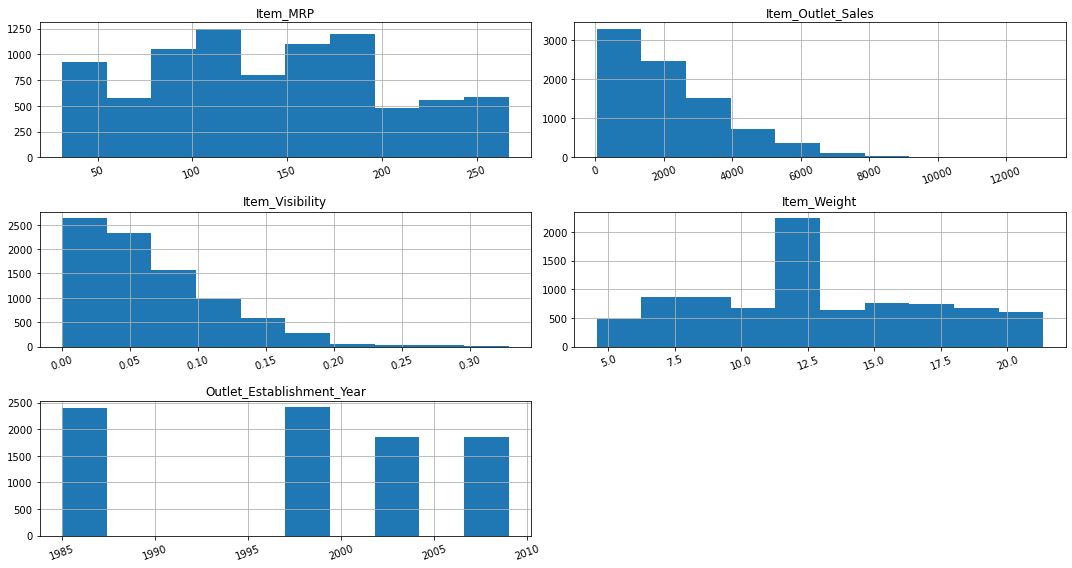

In [26]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
data_train.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

#### Visualise the target variable

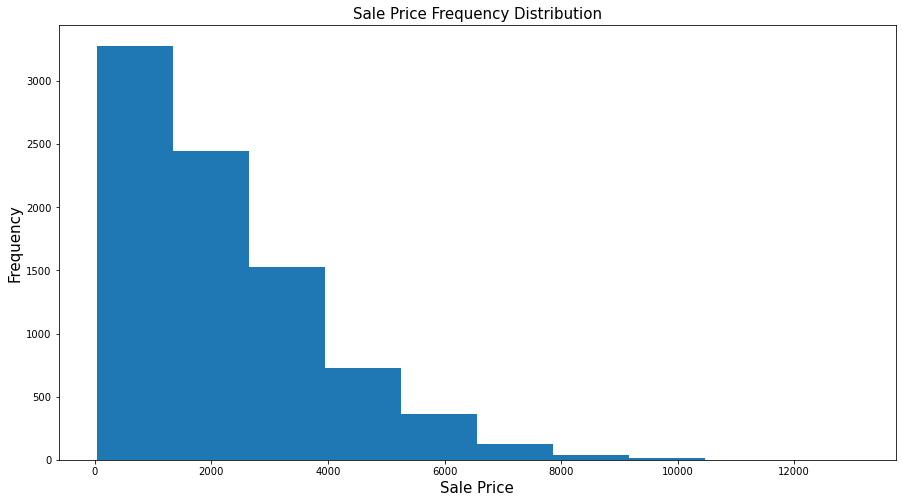

In [27]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Sale Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(data_train["Item_Outlet_Sales"])
plt.show()

In [28]:
# Separate data_train and data_test into numerical and categorical features
train_cat = data_train.select_dtypes(include = 'object')
train_num = data_train.select_dtypes(exclude = 'object')

test_cat = data_test.select_dtypes(include = 'object')
test_num = data_test.select_dtypes(exclude = 'object')

In [29]:
#frequency of categories
for col in train_cat:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
NCP41    10
FDH40    10
NCR30    10
NCE31    10
FDP23    10
         ..
FDO33     7
NCL42     7
FDM52     7
DRN11     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT

### 4.3.1 Distribution of categorical variables

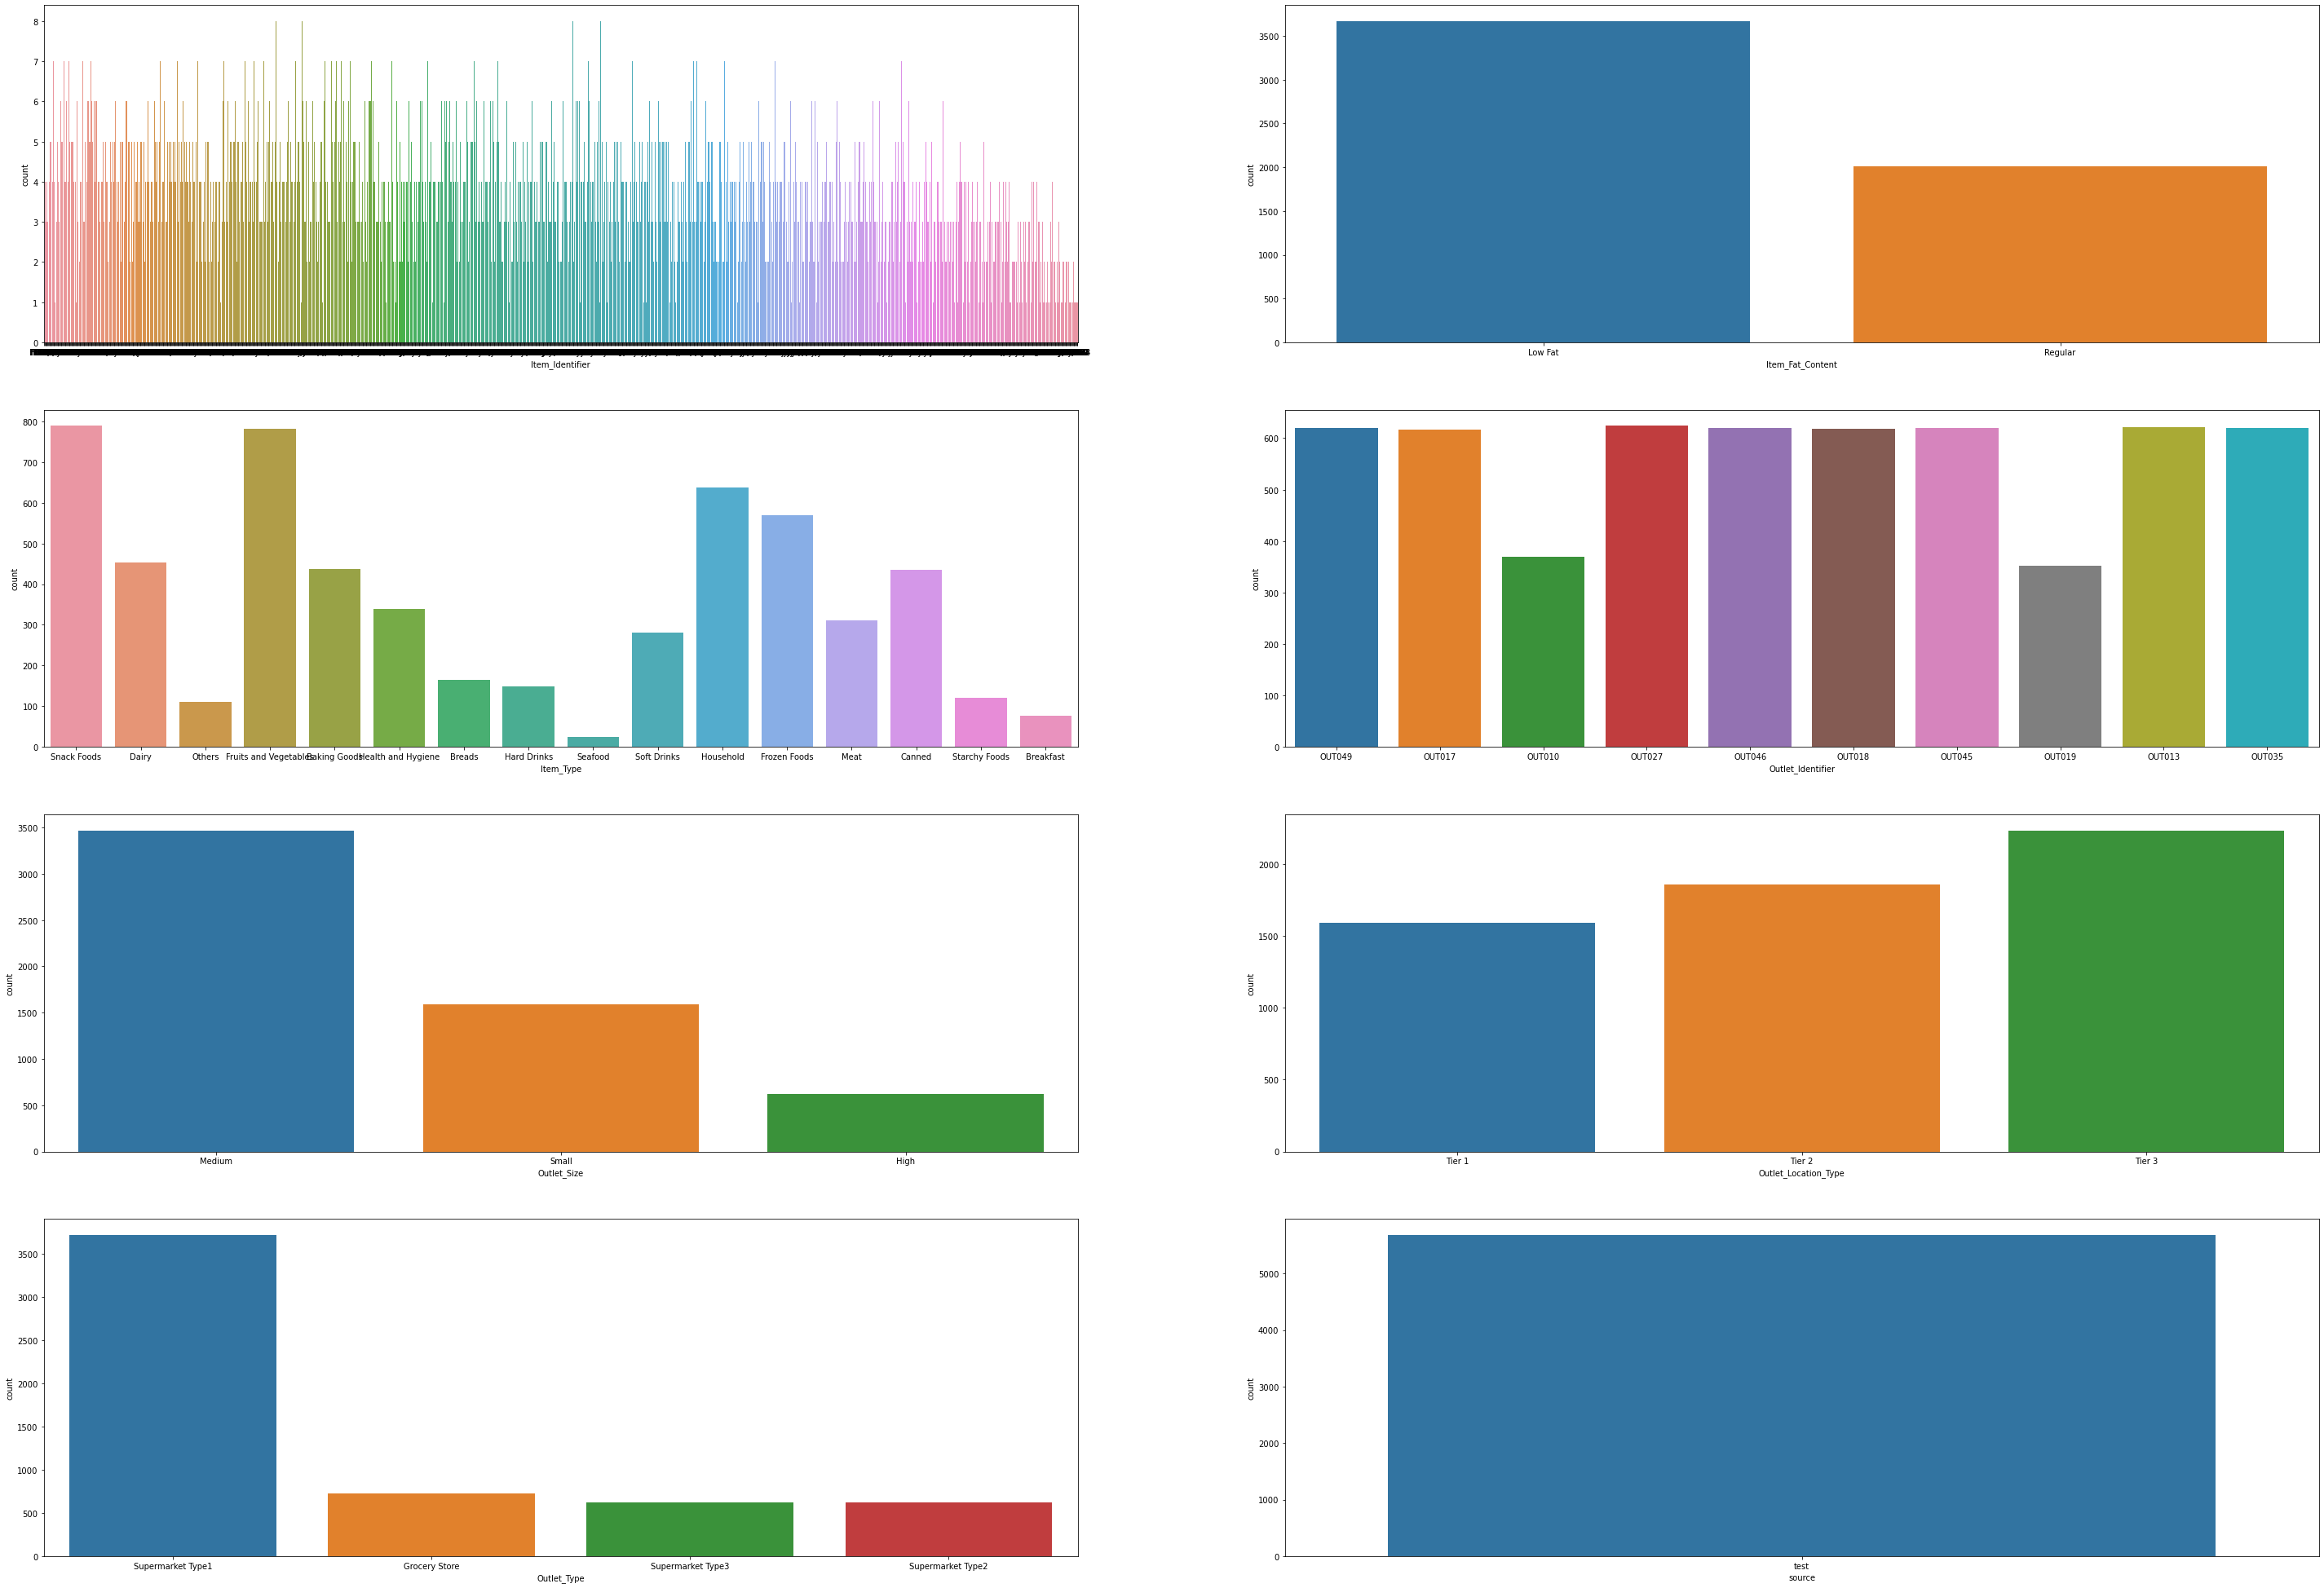

In [30]:
# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(4, 2, figsize = (50, 35))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(test_cat, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(test_cat[variable], ax = subplot)
    
# display the plot
plt.show()

In [31]:
# combining Item_Outlet_Sales column to train_cat to visualise relation between categorical features with output variable
train_cat = pd.concat([train_cat, train_num['Item_Outlet_Sales']], axis=1)
train_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,443.4228
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,2097.2700
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,train,732.3800
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train,994.7052
...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,train,2778.3834
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1,train,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,train,1193.1136
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,train,1845.5976


Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

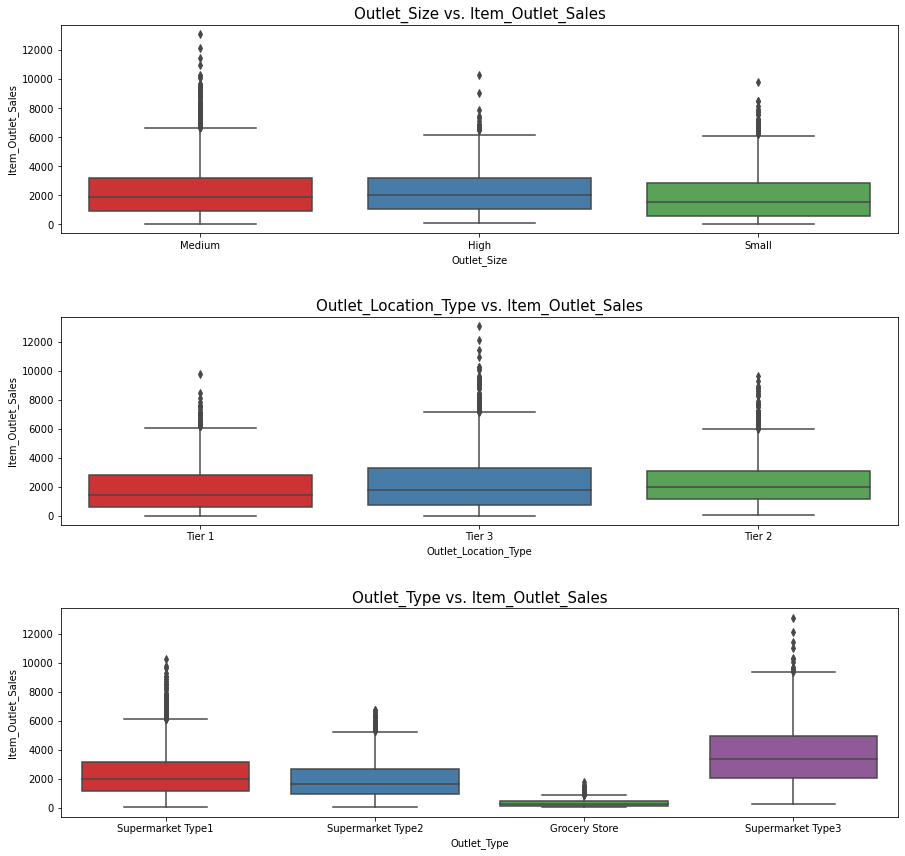

In [32]:
plt.figure(figsize = (15,8))

plt.subplot(311)
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_cat, palette="Set1")
ax.set_title("Outlet_Size vs. Item_Outlet_Sales", fontsize=15)

plt.subplot(312)
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_cat, palette="Set1")
ax.set_title("Outlet_Location_Type vs. Item_Outlet_Sales", fontsize=15)

plt.subplot(313)
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_cat, palette="Set1")
ax.set_title("Outlet_Type vs. Item_Outlet_Sales", fontsize=15)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

Lets start looking Outlet_Identifier, Item_Type in Item_Outlet_Sale

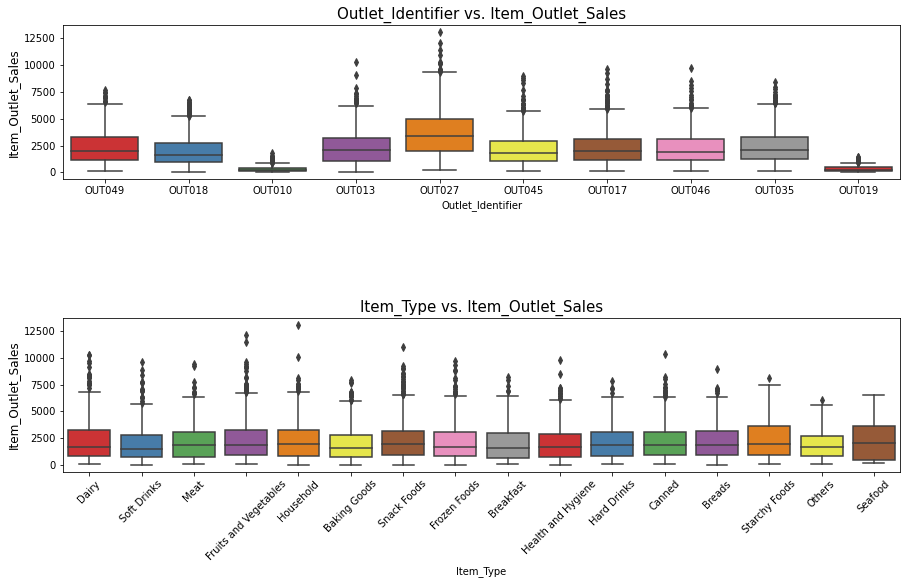

In [33]:
plt.figure(figsize = (15,8))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_cat, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_cat, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

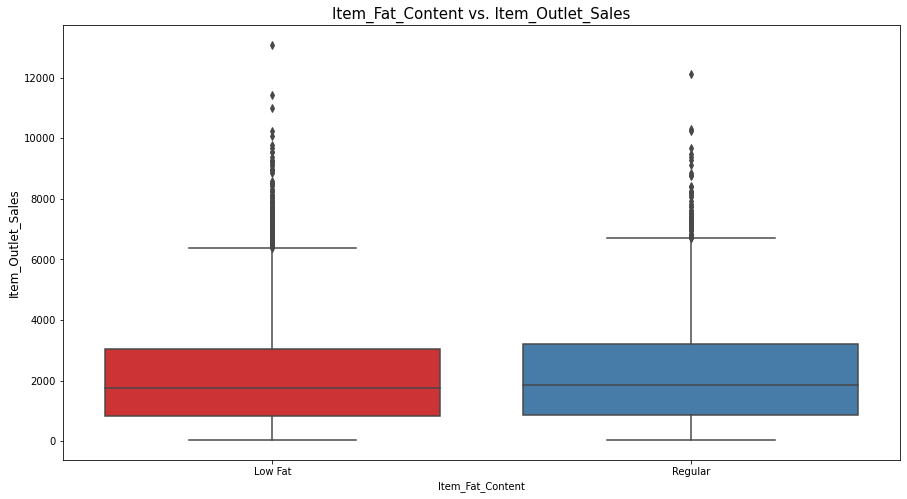

In [34]:
plt.figure(figsize = (15,8))

plt.subplot(111)
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_cat, palette="Set1")
ax.set_title("Item_Fat_Content vs. Item_Outlet_Sales", fontsize=15)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.show()

### 4.3.2 Distribution of numerical varibales

C:\Users\himag\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


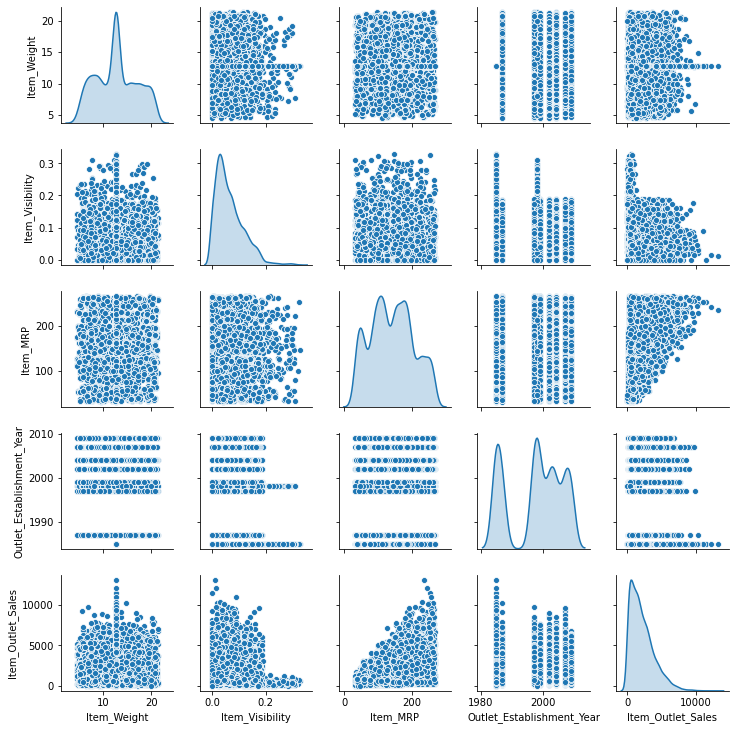

In [35]:
# Pairplot of numeric variables

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(train_num, size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

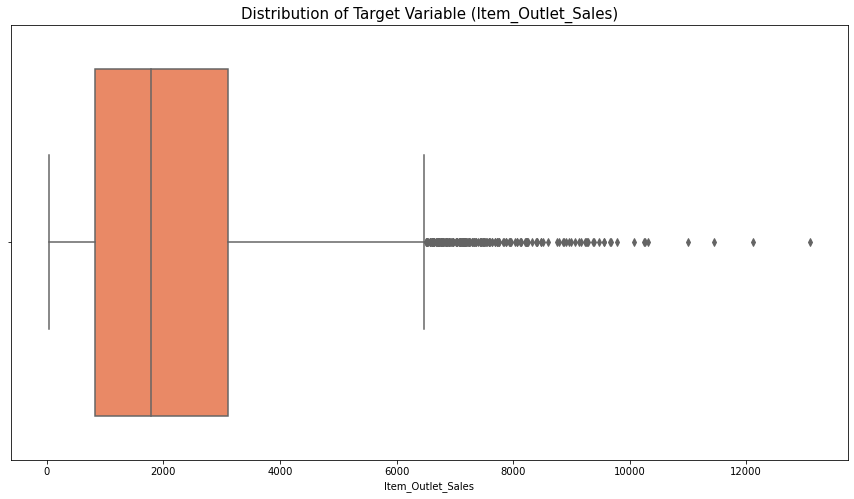

In [36]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(train_num['Item_Outlet_Sales'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Item_Outlet_Sales)', fontsize = 15)

# display the plot
plt.show()

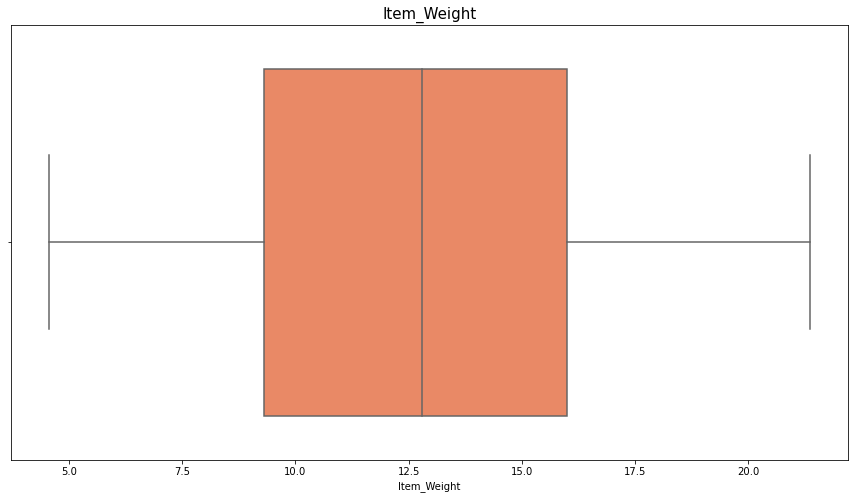

In [37]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(train_num['Item_Weight'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Item_Weight', fontsize = 15)

# display the plot
plt.show()

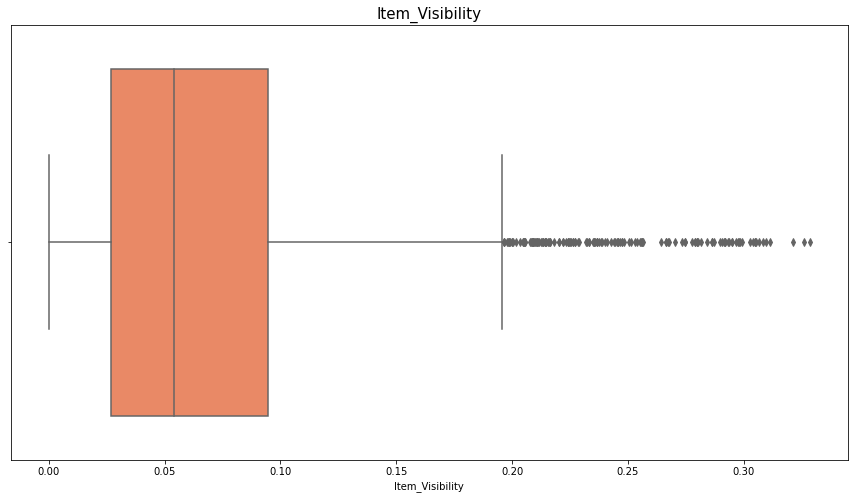

In [38]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(train_num['Item_Visibility'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Item_Visibility', fontsize = 15)

# display the plot
plt.show()

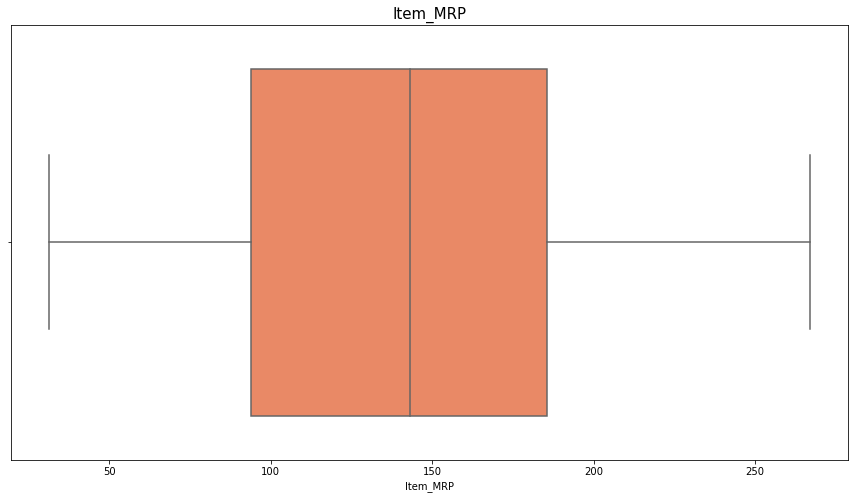

In [39]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(train_num['Item_MRP'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Item_MRP', fontsize = 15)

# display the plot
plt.show()

In [40]:
# Outliers
train_num[train_num.Item_Outlet_Sales > 10000]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
1009,12.792854,0.034584,248.3750,1985,10236.6750
1450,12.792854,0.000000,253.0356,1985,11445.1020
4349,12.792854,0.088840,254.2672,1985,10993.6896
4888,14.850000,0.019495,261.2910,1987,10256.6490
5223,12.792854,0.014296,242.6512,1985,12117.5600
6541,12.792854,0.030693,228.0352,1985,10306.5840
7188,12.792854,0.010551,234.9958,1985,13086.9648
7191,12.792854,0.044445,245.2802,1985,10072.8882


## 4.4 Study Correlation

Now, as we have seen the visualisation for numerical and categorical features separately, we can combine them for further process.

In [41]:
train_cat.drop(['Item_Outlet_Sales'], axis=1, inplace=True)
train_modified = pd.concat([train_cat, train_num], axis=1)
test_modified = pd.concat([test_cat, test_num], axis=1)
train_modified

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,9.300,0.016047,249.8092,1999,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,5.920,0.019278,48.2692,2009,443.4228
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,17.500,0.016760,141.6180,1999,2097.2700
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,train,19.200,0.000000,182.0950,1998,732.3800
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,train,6.865,0.056783,214.5218,1987,2778.3834
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1,train,8.380,0.046982,108.1570,2002,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,train,10.600,0.035186,85.1224,2004,1193.1136
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,train,7.210,0.145221,103.1332,2009,1845.5976


In [42]:
test_modified

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1,test,20.750000,0.007565,107.8622,1999,0.0
1,FDW14,Regular,Dairy,OUT017,Medium,Tier 2,Supermarket Type1,test,8.300000,0.038428,87.3198,2007,0.0
2,NCN55,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store,test,14.600000,0.099575,241.7538,1998,0.0
3,FDQ58,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1,test,7.315000,0.015388,155.0340,2007,0.0
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3,test,12.792854,0.118599,234.2300,1985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test,10.500000,0.013496,141.3154,1997,0.0
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test,7.600000,0.142991,169.1448,2009,0.0
5678,NCO17,Low Fat,Health and Hygiene,OUT045,Medium,Tier 2,Supermarket Type1,test,10.000000,0.073529,118.7440,2002,0.0
5679,FDJ26,Regular,Canned,OUT017,Medium,Tier 2,Supermarket Type1,test,15.300000,0.000000,214.6218,2007,0.0


In [43]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = train_modified.corr()

# print the correlation matrix
corrmat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012582,0.024806,-0.004267,0.011083
Item_Visibility,-0.012582,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024806,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.004267,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011083,-0.128625,0.567574,-0.049135,1.000000


**There is almost no correlation between input variables**

## 4.5 Outlier Treatments

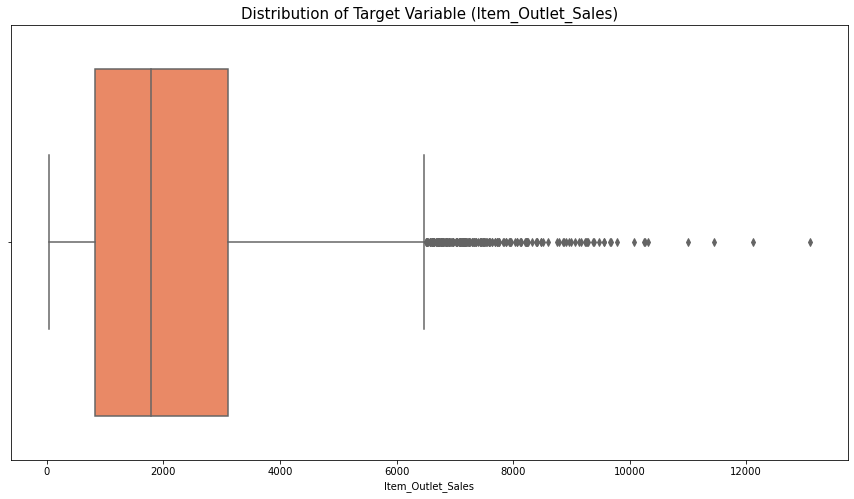

In [44]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(train_modified['Item_Outlet_Sales'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Item_Outlet_Sales)', fontsize = 15)

# display the plot
plt.show()

In [45]:
# Removing extreme outliers which have Item_Outlet_Sales values geaater than 10000
train_modified = train_modified[train_modified['Item_Outlet_Sales'] < 10000]
train_modified.shape

(8515, 13)

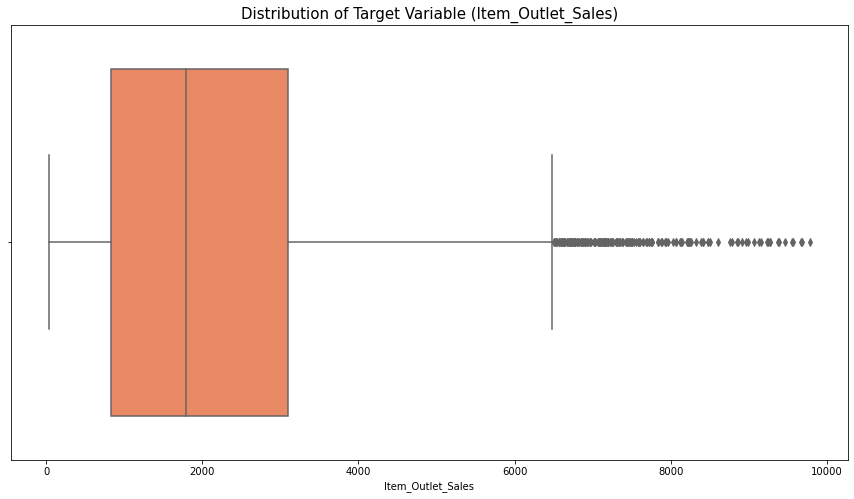

In [46]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(train_modified['Item_Outlet_Sales'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Item_Outlet_Sales)', fontsize = 15)

# display the plot
plt.show()

## 4.6 Feature Engineering

In [47]:
# To perform feature engineering, we need to combine train and test data first, so that what we are applying on our train data, that should be applied to test data
data_modified = pd.concat([train_modified, test_modified], axis=0)
data_modified

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,9.30,0.016047,249.8092,1999,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,5.92,0.019278,48.2692,2009,443.4228
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,17.50,0.016760,141.6180,1999,2097.2700
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,train,19.20,0.000000,182.0950,1998,732.3800
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test,10.50,0.013496,141.3154,1997,0.0000
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test,7.60,0.142991,169.1448,2009,0.0000
5678,NCO17,Low Fat,Health and Hygiene,OUT045,Medium,Tier 2,Supermarket Type1,test,10.00,0.073529,118.7440,2002,0.0000
5679,FDJ26,Regular,Canned,OUT017,Medium,Tier 2,Supermarket Type1,test,15.30,0.000000,214.6218,2007,0.0000


#### Create a broad category of Item_Type

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [48]:
#Get the first two characters of ID:
data_modified['Item_Type_Combined'] = data_modified['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data_modified['Item_Type_Combined'] = data_modified['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data_modified['Item_Type_Combined'].value_counts()

Food              10195
Non-Consumable     2684
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [49]:
# Now we can drop Item_Identifier and Item_Type from our data
data_modified.drop(['Item_Identifier','Item_Type'], axis=1, inplace=True)
data_modified

,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined
0,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,train,9.30,0.016047,249.8092,1999,3735.1380,Food
1,Regular,OUT018,Medium,Tier 3,Supermarket Type2,train,5.92,0.019278,48.2692,2009,443.4228,Drinks
2,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,train,17.50,0.016760,141.6180,1999,2097.2700,Food
3,Regular,OUT010,Medium,Tier 3,Grocery Store,train,19.20,0.000000,182.0950,1998,732.3800,Food
4,Low Fat,OUT013,High,Tier 3,Supermarket Type1,train,8.93,0.000000,53.8614,1987,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Regular,OUT046,Small,Tier 1,Supermarket Type1,test,10.50,0.013496,141.3154,1997,0.0000,Food
5677,Regular,OUT018,Medium,Tier 3,Supermarket Type2,test,7.60,0.142991,169.1448,2009,0.0000,Food
5678,Low Fat,OUT045,Medium,Tier 2,Supermarket Type1,test,10.00,0.073529,118.7440,2002,0.0000,Non-Consumable
5679,Regular,OUT017,Medium,Tier 2,Supermarket Type1,test,15.30,0.000000,214.6218,2007,0.0000,Food


#### Modify Item_Visibility

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [50]:
data_modified['Item_Visibility'] = data_modified['Item_Visibility'].replace(0, data_modified['Item_Visibility'].mean())
data_modified[data_modified['Item_Visibility'] == 0]

,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined


## 4.7 One Hot Encoding

In [51]:
# Splitting into numerical and categorical features again
data_mod_num = data_modified.select_dtypes(exclude = 'object')
data_mod_cat = data_modified.select_dtypes(include = 'object')

In [52]:
#One Hot Coding:
one_hot_data = pd.get_dummies(data_mod_cat, drop_first=True)
one_hot_data

,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_train,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5677,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
5678,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
5679,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [53]:
# Combining categorical on hot encoded features and numerical features
sales = pd.concat([one_hot_data, data_mod_num], axis=1)
sales

,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_train,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,9.30,0.016047,249.8092,1999,3735.1380
1,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,5.92,0.019278,48.2692,2009,443.4228
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,17.50,0.016760,141.6180,1999,2097.2700
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,19.20,0.065973,182.0950,1998,732.3800
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,8.93,0.065973,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,10.50,0.013496,141.3154,1997,0.0000
5677,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,7.60,0.142991,169.1448,2009,0.0000
5678,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,10.00,0.073529,118.7440,2002,0.0000
5679,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,15.30,0.065973,214.6218,2007,0.0000


In [54]:
# Splitting into train and test
sales_train = sales[sales['source_train'] == 1]
sales_test = sales[sales['source_train'] == 0]
sales_train.drop(['source_train'], axis=1, inplace=True)
sales_test.drop(['Item_Outlet_Sales', 'source_train'], axis=1, inplace=True)
sales_train

C:\Users\himag\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,9.300,0.016047,249.8092,1999,3735.1380
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,5.920,0.019278,48.2692,2009,443.4228
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,17.500,0.016760,141.6180,1999,2097.2700
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,19.200,0.065973,182.0950,1998,732.3800
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,8.930,0.065973,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,6.865,0.056783,214.5218,1987,2778.3834
8519,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,8.380,0.046982,108.1570,2002,549.2850
8520,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,10.600,0.035186,85.1224,2004,1193.1136
8521,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,7.210,0.145221,103.1332,2009,1845.5976


In [55]:
sales_test

,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,...,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,20.750000,0.007565,107.8622,1999
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,8.300000,0.038428,87.3198,2007
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,14.600000,0.099575,241.7538,1998
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,7.315000,0.015388,155.0340,2007
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,12.792854,0.118599,234.2300,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,10.500000,0.013496,141.3154,1997
5677,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,7.600000,0.142991,169.1448,2009
5678,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,10.000000,0.073529,118.7440,2002
5679,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,15.300000,0.065973,214.6218,2007


**Now Our train and test data are completely ready for Model building and prediction respictively**

# 5. Model Building

In [56]:
# Splitting sales_train into train and validation set
X = sales_train.drop('Item_Outlet_Sales', axis=1)
y = sales_train['Item_Outlet_Sales']
X

,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,...,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,9.300,0.016047,249.8092,1999
1,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,5.920,0.019278,48.2692,2009
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,17.500,0.016760,141.6180,1999
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,19.200,0.065973,182.0950,1998
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,8.930,0.065973,53.8614,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,6.865,0.056783,214.5218,1987
8519,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,8.380,0.046982,108.1570,2002
8520,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,10.600,0.035186,85.1224,2004
8521,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,7.210,0.145221,103.1332,2009


In [57]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8515, dtype: float64

In [58]:
# train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3, random_state = 1)
# print dimension of predictors train set
print("The shape of X_train is:", X_train.shape)

# print dimension of predictors validation set
print("The shape of X_validation is:", X_validation.shape)

# print dimension of target train set
print("The shape of y_train is:", y_train.shape)

# print dimension of target validation set
print("The shape of y_validation is:", y_validation.shape)

The shape of X_train is: (5960, 23)
The shape of X_validation is: (2555, 23)
The shape of y_train is: (5960,)
The shape of y_validation is: (2555,)


## 5.1 Linear Regression

In [59]:
#Train the model
lr = LinearRegression()
#Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
lr_predicted = lr.predict(X_validation)
lr_predicted

array([2917.10187521, 2146.50567045, 2130.36802125, ..., 2564.76165158,
       1029.28101586, 2284.613827  ])

In [61]:
lr_actual = y_validation

**Compute accuracy measures**

In [62]:
# calculate MSE
lr_MSE = mean_squared_error(lr_actual, lr_predicted)

# calculate MAE
lr_MAE = mean_absolute_error(lr_actual, lr_predicted)

# calculate RMSE
from math import sqrt
lr_RMSE = sqrt(lr_MSE)

# calculate R_squared
lr_R_squared = r2_score(lr_actual, lr_predicted)

**Tabulate the Results**

In [63]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'MSE', 'MAE', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg = pd.Series({'Model': "Linear Regression",
                     'MSE': lr_MSE,
                     'MAE': lr_MAE,
                     'RMSE': lr_RMSE,
                     'R-Squared': lr_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304


## 5.2 Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=-1, random_state=2)

# Fitting the model on our trained dataset.
RFR.fit(X_train, y_train)

# Making Predictions
RFR_predicted = RFR.predict(X_validation)

In [65]:
# calculate MSE
RFR_MSE = mean_squared_error(lr_actual, RFR_predicted)

# calculate MAE
RFR_MAE = mean_absolute_error(lr_actual, RFR_predicted)

# calculate RMSE
from math import sqrt
RFR_RMSE = sqrt(RFR_MSE)

# calculate R_squared
RFR_R_squared = r2_score(lr_actual, RFR_predicted)

In [66]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "Random Forest Regressor 1",
                     'MSE': RFR_MSE,
                     'MAE': RFR_MAE,
                     'RMSE': RFR_RMSE,
                     'R-Squared': RFR_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446


In [67]:
from sklearn.ensemble import RandomForestRegressor

RFR2 = RandomForestRegressor(n_estimators=250, max_depth=6, min_samples_leaf=120, n_jobs=-1, random_state=3)

# Fitting the model on our trained dataset.
RFR2.fit(X_train, y_train)

# Making Predictions
RFR2_predicted = RFR2.predict(X_validation)

In [68]:
# calculate MSE
RFR2_MSE = mean_squared_error(lr_actual, RFR2_predicted)

# calculate MAE
RFR2_MAE = mean_absolute_error(lr_actual, RFR2_predicted)

# calculate RMSE
from math import sqrt
RFR2_RMSE = sqrt(RFR2_MSE)

# calculate R_squared
RFR2_R_squared = r2_score(lr_actual, RFR2_predicted)

In [69]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "Random Forest Regressor 2",
                     'MSE': RFR2_MSE,
                     'MAE': RFR2_MAE,
                     'RMSE': RFR2_RMSE,
                     'R-Squared': RFR2_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446
2,Random Forest Regressor 2,1.164642e+06,776.215961,1079.185836,0.590426


## 5.3 Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
#Train the model
GBR = GradientBoostingRegressor(n_estimators=200, max_depth=5)
#Fit the model
GBR.fit(X_train, y_train)
# Making Predictions
GBR_predicted = GBR.predict(X_validation)

In [71]:
# calculate MSE
GBR_MSE = mean_squared_error(lr_actual, GBR_predicted)

# calculate MAE
GBR_MAE = mean_absolute_error(lr_actual, GBR_predicted)

# calculate RMSE
from math import sqrt
GBR_RMSE = sqrt(GBR_MSE)

# calculate R_squared
GBR_R_squared = r2_score(lr_actual, GBR_predicted)

In [72]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "Gradient Boosting Regressor 2",
                     'MSE': GBR_MSE,
                     'MAE': GBR_MAE,
                     'RMSE': GBR_RMSE,
                     'R-Squared': GBR_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446
2,Random Forest Regressor 2,1.164642e+06,776.215961,1079.185836,0.590426
3,Gradient Boosting Regressor 2,1.192012e+06,768.380000,1091.793172,0.580801


## 5.4 XGBoost Regresoor

In [75]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5)
XGBR.fit(X_train, y_train)

XGBR_predicted = XGBR.predict(X_validation)

In [76]:
# calculate MSE
XGBR_MSE = mean_squared_error(lr_actual, XGBR_predicted)

# calculate MAE
XGBR_MAE = mean_absolute_error(lr_actual, XGBR_predicted)

# calculate RMSE
from math import sqrt
XGBR_RMSE = sqrt(XGBR_MSE)

# calculate R_squared
XGBR_R_squared = r2_score(lr_actual, XGBR_predicted)

In [77]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "XGBoost Regressor ",
                     'MSE': XGBR_MSE,
                     'MAE': XGBR_MAE,
                     'RMSE': XGBR_RMSE,
                     'R-Squared': XGBR_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446
2,Random Forest Regressor 2,1.164642e+06,776.215961,1079.185836,0.590426
3,Gradient Boosting Regressor 2,1.192012e+06,768.380000,1091.793172,0.580801
4,XGBoost Regressor,1.272163e+06,792.521785,1127.902212,0.552614


In [78]:
from xgboost import XGBRegressor

XGBR2 = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
XGBR2.fit(X_train, y_train)

XGBR2_predicted = XGBR2.predict(X_validation)

In [79]:
# calculate MSE
XGBR2_MSE = mean_squared_error(lr_actual, XGBR2_predicted)

# calculate MAE
XGBR2_MAE = mean_absolute_error(lr_actual, XGBR2_predicted)

# calculate RMSE
from math import sqrt
XGBR2_RMSE = sqrt(XGBR2_MSE)

# calculate R_squared
XGBR2_R_squared = r2_score(lr_actual, XGBR2_predicted)

In [80]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "XGBoost Regressor 2",
                     'MSE': XGBR2_MSE,
                     'MAE': XGBR2_MAE,
                     'RMSE': XGBR2_RMSE,
                     'R-Squared': XGBR2_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446
2,Random Forest Regressor 2,1.164642e+06,776.215961,1079.185836,0.590426
3,Gradient Boosting Regressor 2,1.192012e+06,768.380000,1091.793172,0.580801
4,XGBoost Regressor,1.272163e+06,792.521785,1127.902212,0.552614
5,XGBoost Regressor 2,1.166107e+06,757.167394,1079.864479,0.589911


## 5.5 Extra Trees Regressor

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor(n_estimators=100, random_state=4)
ETR.fit(X_train, y_train)

ETR_predicted = ETR.predict(X_validation)

In [82]:
# calculate MSE
ETR_MSE = mean_squared_error(lr_actual, ETR_predicted)

# calculate MAE
ETR_MAE = mean_absolute_error(lr_actual, ETR_predicted)

# calculate RMSE
from math import sqrt
ETR_RMSE = sqrt(ETR_MSE)

# calculate R_squared
ETR_R_squared = r2_score(lr_actual, ETR_predicted)

In [83]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "Extra Trees Regressor ",
                     'MSE': ETR_MSE,
                     'MAE': ETR_MAE,
                     'RMSE': ETR_RMSE,
                     'R-Squared': ETR_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446
2,Random Forest Regressor 2,1.164642e+06,776.215961,1079.185836,0.590426
3,Gradient Boosting Regressor 2,1.192012e+06,768.380000,1091.793172,0.580801
4,XGBoost Regressor,1.272163e+06,792.521785,1127.902212,0.552614
5,XGBoost Regressor 2,1.166107e+06,757.167394,1079.864479,0.589911
6,Extra Trees Regressor,1.341412e+06,810.171658,1158.193400,0.528261


## 5.6 SVM Regressor

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [85]:
SVMR = SVR()
SVMR.fit(X_train, y_train)

SVMR_predicted = SVMR.predict(X_validation)

In [86]:
# calculate MSE
SVMR_MSE = mean_squared_error(lr_actual, SVMR_predicted)

# calculate MAE
SVMR_MAE = mean_absolute_error(lr_actual, SVMR_predicted)

# calculate RMSE
from math import sqrt
SVMR_RMSE = sqrt(SVMR_MSE)

# calculate R_squared
SVMR_R_squared = r2_score(lr_actual, SVMR_predicted)

In [87]:
# append the result table 
# compile the required information

linreg = pd.Series({'Model': "SVM Regressor ",
                     'MSE': SVMR_MSE,
                     'MAE': SVMR_MAE,
                     'RMSE': SVMR_RMSE,
                     'R-Squared': SVMR_R_squared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg, ignore_index = True)

# print the result table
result_tabulation

,Model,MSE,MAE,RMSE,R-Squared
0,Linear Regression,1.224704e+06,825.831595,1106.663319,0.569304
1,Random Forest Regressor 1,1.147524e+06,767.732460,1071.225566,0.596446
2,Random Forest Regressor 2,1.164642e+06,776.215961,1079.185836,0.590426
3,Gradient Boosting Regressor 2,1.192012e+06,768.380000,1091.793172,0.580801
4,XGBoost Regressor,1.272163e+06,792.521785,1127.902212,0.552614
5,XGBoost Regressor 2,1.166107e+06,757.167394,1079.864479,0.589911
6,Extra Trees Regressor,1.341412e+06,810.171658,1158.193400,0.528261
7,SVM Regressor,2.966032e+06,1299.022307,1722.217146,-0.043075


# 6. Conclusion

**Now, as we can see, the best results we got after applying different regression models is 'Random Forest Regressor 1'. Hence we will go ahead with that model and predict the sales values for our unseen test data.**

# 7. Prediction for Test Data

In [89]:
sales_predict = RFR.predict(sales_test)
sales_predict

array([1690.76065765, 1479.04407078,  613.93107244, ..., 2032.95935346,
       3622.59887539, 1396.46555173])

In [90]:
sales_test['Item_Outlet_Sales_predicted'] = sales_predict
sales_test

<ipython-input-90-47da0273b4c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_test['Item_Outlet_Sales_predicted'] = sales_predict


,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales_predicted
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,20.750000,0.007565,107.8622,1999,1690.760658
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,8.300000,0.038428,87.3198,2007,1479.044071
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,14.600000,0.099575,241.7538,1998,613.931072
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,7.315000,0.015388,155.0340,2007,2535.509985
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,12.792854,0.118599,234.2300,1985,5348.360251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,10.500000,0.013496,141.3154,1997,2142.778344
5677,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,7.600000,0.142991,169.1448,2009,2759.388757
5678,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,10.000000,0.073529,118.7440,2002,2032.959353
5679,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,15.300000,0.065973,214.6218,2007,3622.598875
